## Load libraries and data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

sns.set_palette("Set2")

In [2]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [3]:
df = pd.read_csv('/kaggle/input/loan-status-prediction/loan_data.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


## Analyze data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            381 non-null    object 
 1   Gender             376 non-null    object 
 2   Married            381 non-null    object 
 3   Dependents         373 non-null    object 
 4   Education          381 non-null    object 
 5   Self_Employed      360 non-null    object 
 6   ApplicantIncome    381 non-null    int64  
 7   CoapplicantIncome  381 non-null    float64
 8   LoanAmount         381 non-null    float64
 9   Loan_Amount_Term   370 non-null    float64
 10  Credit_History     351 non-null    float64
 11  Property_Area      381 non-null    object 
 12  Loan_Status        381 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 38.8+ KB


In [5]:
df.isnull().sum()

Loan_ID               0
Gender                5
Married               0
Dependents            8
Education             0
Self_Employed        21
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     11
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,381.000000,381.000000,381.000000,370.000000,351.000000
mean,3579.845144,1277.275381,104.986877,340.864865,0.837607
std,1419.813818,2340.818114,28.358464,68.549257,0.369338
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2600.000000,0.000000,90.000000,360.000000,1.000000
50%,3333.000000,983.000000,110.000000,360.000000,1.000000
75%,4288.000000,2016.000000,127.000000,360.000000,1.000000
max,9703.000000,33837.000000,150.000000,480.000000,1.000000


In [7]:
df.describe(include='O')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,381,376,381,373,381,360,381,381
unique,381,2,2,4,2,2,3,2
top,LP001003,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,291,228,234,278,325,149,271


In [8]:
df['Education'].value_counts()

Education
Graduate        278
Not Graduate    103
Name: count, dtype: int64

In [9]:
df['Property_Area'].unique()

array(['Rural', 'Urban', 'Semiurban'], dtype=object)

In [10]:
df['Credit_History'].unique()

array([ 1., nan,  0.])

In [11]:
df['Loan_Status_numeric'] = df['Loan_Status'].map({'Y': 1, 'N':0}).astype(int)

In [12]:
df[['Gender', 'Loan_Status_numeric']].groupby('Gender', as_index=False).mean()

,Gender,Loan_Status_numeric
0,Female,0.694118
1,Male,0.725086


Observation: 
* Loans were granted to women in 69,4%, to men in 72,5%.
* Gender has no impact on granting a loan.

Decision:
Gender feature should not be included for model training.

In [13]:
df[['Married', 'Loan_Status_numeric']].groupby('Married', as_index=False).mean()

,Married,Loan_Status_numeric
0,No,0.660131
1,Yes,0.745614


Observation: 
* Married people were slightly more likely to receive loans (74,6%) than unmarried (66,0%).

Decision:
Married feature should not be icluded for model training.
Create new column - Income per person in family.

In [14]:
df[['Dependents', 'Loan_Status_numeric']].groupby('Dependents', as_index=False).mean()

,Dependents,Loan_Status_numeric
0,0,0.717949
1,1,0.673077
2,2,0.745763
3,3+,0.714286


Observation:
* There are no significant differences in granting loans between people who have dependents than not.

Decision:
* Complete feature for null values.
* Create new column - Income per person in family. 

In [15]:
df[['Education', 'Loan_Status_numeric']].groupby('Education', as_index=False).mean()

,Education,Loan_Status_numeric
0,Graduate,0.726619
1,Not Graduate,0.669903


Observation:
* Graduated people were slightly more likely to receive loans (72,7%) than not graduated (67,0%).

Decision: Education feature should not be icluded for model training. 

In [16]:
df[['Self_Employed', 'Loan_Status_numeric']].groupby('Self_Employed', as_index=False).mean()

,Self_Employed,Loan_Status_numeric
0,No,0.707692
1,Yes,0.685714


Observation:
* Not self-employed were slightly more likely to receive loans (70,8%) than self-employed (68,6%).

Decision: This feature should not be icluded for model training.

In [17]:
df[['Property_Area', 'Loan_Status_numeric']].groupby('Property_Area', as_index=False).mean()

,Property_Area,Loan_Status_numeric
0,Rural,0.613208
1,Semiurban,0.798658
2,Urban,0.690476


Observaions:
* People from semiurban area were more likely to receive loans (80,0%) than from urban (69,0%) and rural area (61,3%).

Decision: 
* Consider Property area feature for model training.
* Consider banding this feature.

In [18]:
df[['Credit_History', 'Loan_Status_numeric']].groupby('Credit_History', as_index=False).mean()

,Credit_History,Loan_Status_numeric
0,0.0,0.052632
1,1.0,0.823129


Observations:
* People with credit history were more likely to recieve loans (82,3%) than people without credit history (5,3%).

Decision: 
* Consider Credit History feature for model training.
* Complete feature for null values.

## Data visualization

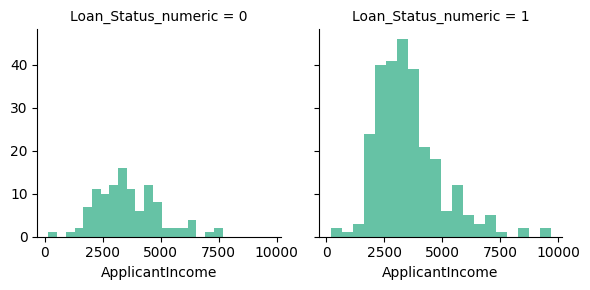

In [19]:
g = sns.FacetGrid(df, col='Loan_Status_numeric')
g.map(plt.hist, 'ApplicantIncome', bins=20)

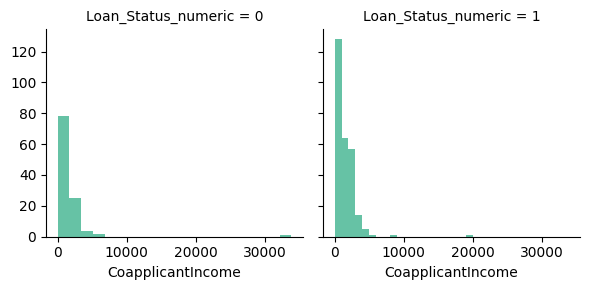

In [20]:
g = sns.FacetGrid(df, col='Loan_Status_numeric')
g.map(plt.hist, 'CoapplicantIncome', bins=20)

Observation:
* It is difficult to determine the relationship between the income itself and the granting of a loan. 

Decision: 
* Create income per person column.
* Consider banding income feature.

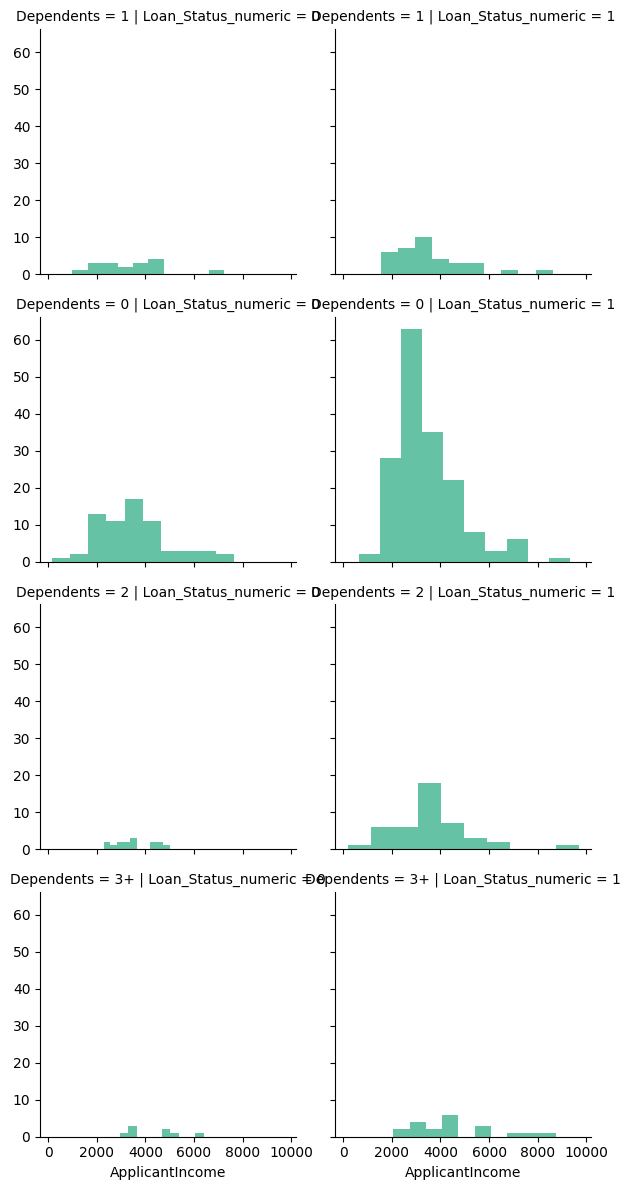

In [21]:
grid = sns.FacetGrid(df, col='Loan_Status_numeric', row='Dependents')
grid.map(plt.hist, 'ApplicantIncome')
grid.add_legend()

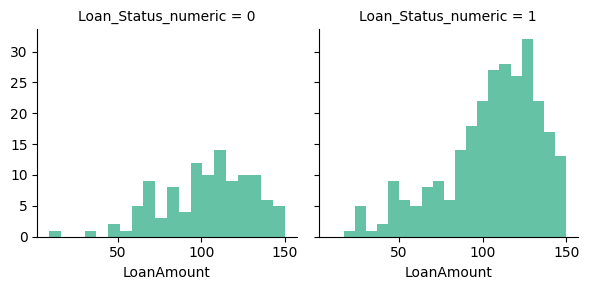

In [22]:
g = sns.FacetGrid(df, col='Loan_Status_numeric')
g.map(plt.hist, 'LoanAmount', bins=20)

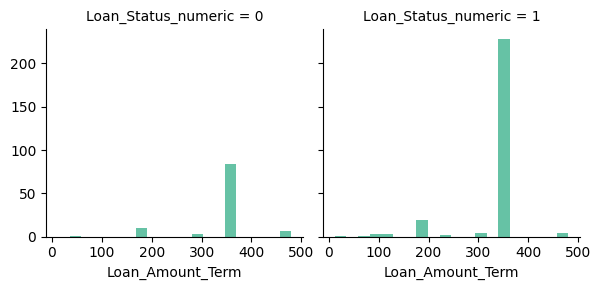

In [23]:
g = sns.FacetGrid(df, col='Loan_Status_numeric')
g.map(plt.hist, 'Loan_Amount_Term', bins=20)

Observations:
* People with higher loan amount and longer term were more likely to recieve loan.

Decision:
* Consider Loan Amount and Loan Amount Term features for model training.
* Complete feature for null values.
* Create new feature - loan installment amount.
* Consider banding loan feature.

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


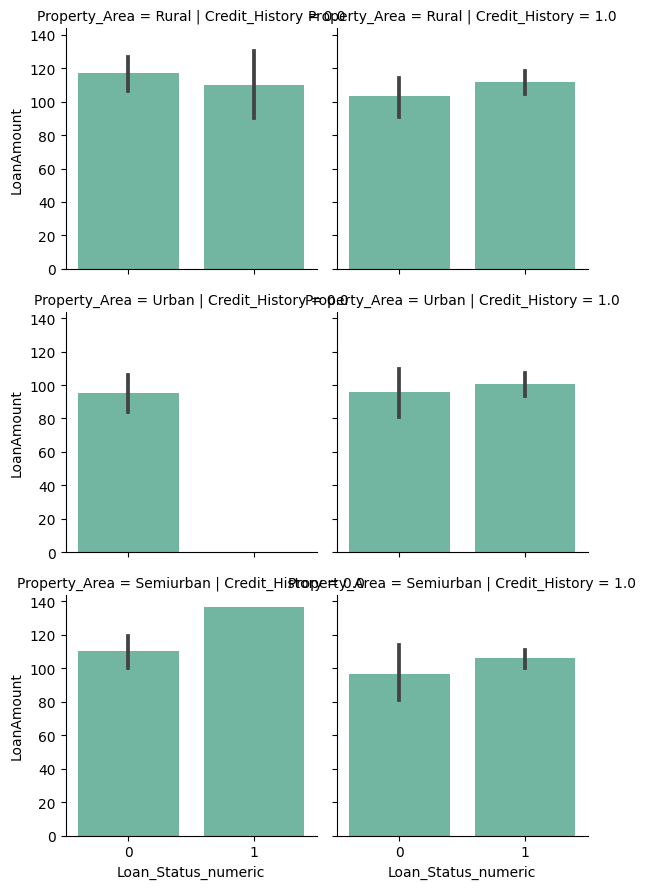

In [24]:
grid = sns.FacetGrid(df, row='Property_Area', col='Credit_History')
grid.map(sns.barplot, 'Loan_Status_numeric', 'LoanAmount')
grid.add_legend()

## Wrangle data

In [25]:
df = df.drop(['Loan_ID', 'Gender', 'Education', 'Self_Employed', 'Loan_Status'], axis=1)

In [26]:
df.rename(columns={'Loan_Status_numeric': 'Loan_Status'}, inplace=True)
df.head()

,Married,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Yes,1,4583,1508.0,128.0,360.0,1.0,Rural,0
1,Yes,0,3000,0.0,66.0,360.0,1.0,Urban,1
2,Yes,0,2583,2358.0,120.0,360.0,1.0,Urban,1
3,No,0,6000,0.0,141.0,360.0,1.0,Urban,1
4,Yes,0,2333,1516.0,95.0,360.0,1.0,Urban,1


In [27]:
df['Married'] = df['Married'].map({'Yes': 1, 'No': 0}).astype(int)

In [28]:
df['Dependents'] = df['Dependents'].fillna(value=0)

In [29]:
df['Dependents'].value_counts()

Dependents
0     234
2      59
1      52
3+     28
0       8
Name: count, dtype: int64

In [30]:
df['Dependents'] = df['Dependents'].map({'0': 0, '1': 1, '2': 2, '3+': 3})

In [31]:
df['Dependents'].value_counts()

Dependents
0.0    234
2.0     59
1.0     52
3.0     28
Name: count, dtype: int64

In [32]:
df['Income_per_person'] = (df['ApplicantIncome'] + df['CoapplicantIncome'])/(1 + df['Married'] + df['Dependents'])

In [33]:
df.head()

,Married,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_per_person
0,1,1.0,4583,1508.0,128.0,360.0,1.0,Rural,0,2030.333333
1,1,0.0,3000,0.0,66.0,360.0,1.0,Urban,1,1500.000000
2,1,0.0,2583,2358.0,120.0,360.0,1.0,Urban,1,2470.500000
3,0,0.0,6000,0.0,141.0,360.0,1.0,Urban,1,6000.000000
4,1,0.0,2333,1516.0,95.0,360.0,1.0,Urban,1,1924.500000


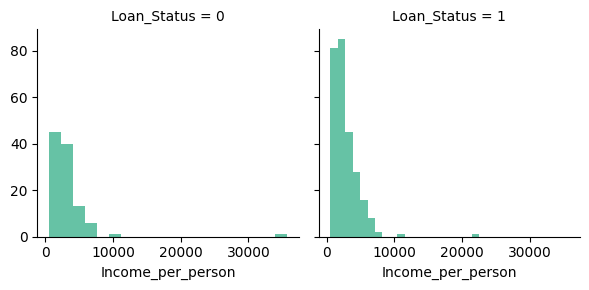

In [34]:
g = sns.FacetGrid(df, col='Loan_Status')
g.map(plt.hist, 'Income_per_person', bins=20)

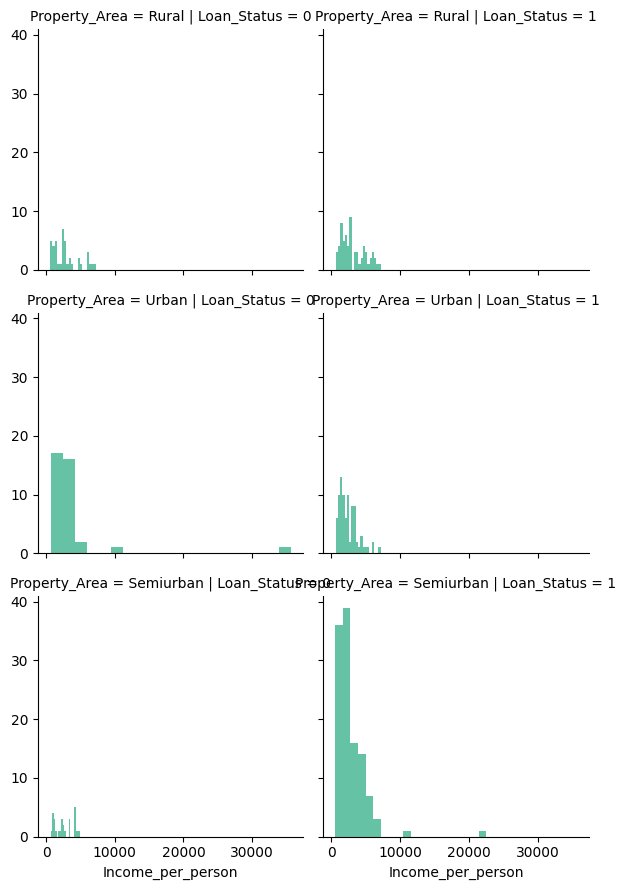

In [35]:
grid = sns.FacetGrid(df, row='Property_Area', col='Loan_Status')
grid.map(plt.hist, 'Income_per_person', bins=20)
grid.add_legend()

In [36]:
df = df.drop(['ApplicantIncome', 'CoapplicantIncome'], axis=1)

In [37]:
df['Income_per_person_band'] = pd.qcut(df['Income_per_person'], 4)

In [38]:
df[['Income_per_person_band', 'Loan_Status']].groupby('Income_per_person_band', as_index=False).mean()

/tmp/ipykernel_18/590493372.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df[['Income_per_person_band', 'Loan_Status']].groupby('Income_per_person_band', as_index=False).mean()


,Income_per_person_band,Loan_Status
0,"(564.999, 1452.0]",0.670213
1,"(1452.0, 2378.0]",0.784946
2,"(2378.0, 3541.5]",0.698925
3,"(3541.5, 35673.0]",0.709677


In [39]:
df.loc[df['Income_per_person'] <= 1452.0, 'Income_per_person'] = 0
df.loc[(df['Income_per_person'] > 1452.0) & (df['Income_per_person'] <= 2378.0), 'Income_per_person'] = 1
df.loc[(df['Income_per_person'] > 2378.0) & (df['Income_per_person'] <= 3541.5), 'Income_per_person'] = 2
df.loc[df['Income_per_person'] > 3541.5, 'Income_per_person'] = 3

In [40]:
df.head()

,Married,Dependents,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_per_person,Income_per_person_band
0,1,1.0,128.0,360.0,1.0,Rural,0,1.0,"(1452.0, 2378.0]"
1,1,0.0,66.0,360.0,1.0,Urban,1,1.0,"(1452.0, 2378.0]"
2,1,0.0,120.0,360.0,1.0,Urban,1,2.0,"(2378.0, 3541.5]"
3,0,0.0,141.0,360.0,1.0,Urban,1,3.0,"(3541.5, 35673.0]"
4,1,0.0,95.0,360.0,1.0,Urban,1,1.0,"(1452.0, 2378.0]"


In [41]:
df = df.drop(['Income_per_person_band'], axis=1)

In [42]:
df['Property_Area'] = df['Property_Area'].map({'Rural': 0, 'Semiurban': 1, 'Urban': 2}).astype(int)

In [43]:
df['Credit_History'] = df['Credit_History'].fillna(value=0)

In [44]:
df.head()

,Married,Dependents,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_per_person
0,1,1.0,128.0,360.0,1.0,0,0,1.0
1,1,0.0,66.0,360.0,1.0,2,1,1.0
2,1,0.0,120.0,360.0,1.0,2,1,2.0
3,0,0.0,141.0,360.0,1.0,2,1,3.0
4,1,0.0,95.0,360.0,1.0,2,1,1.0


### *to be continued...*